In [8]:
import yfinance as yf
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import time

# Function to fetch latest data and test the model
def fetch_data_and_predict():
    # Fetch latest data
    symbol = "^NSEI"
    ticker = yf.Ticker(symbol)
    data = ticker.history(interval="1m", period="1d")
    data.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)

    # Load the model and scaler from .pkl file
    model, scaler = joblib.load('../../technical_analysis_model/model_pkl_files/xgboost_model.pkl')

    # Prepare data for testing
    X = data[['Open', 'High', 'Low', 'Close']]
    y_actual = data['Close'].shift(-1)[:-1]  # Actual closing price of the next minute

    # Feature scaling
    X_scaled = scaler.transform(X[:-1])  # Exclude the last row for which we don't have actual values

    # Predict using the model
    y_predicted = model.predict(X_scaled)

    # Calculate RMSE
    rmse = mean_squared_error(y_actual, y_predicted, squared=False)
    print(f"Root Mean Squared Error (RMSE): {rmse}")

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[:-1], y_actual, label='Actual Close', color='blue')
    plt.plot(data.index[:-1], y_predicted, label='Predicted Close', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

Root Mean Squared Error (RMSE): 8.6923794048832


/home/neo/Desktop/prime/sem6/stock_trading_bot/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


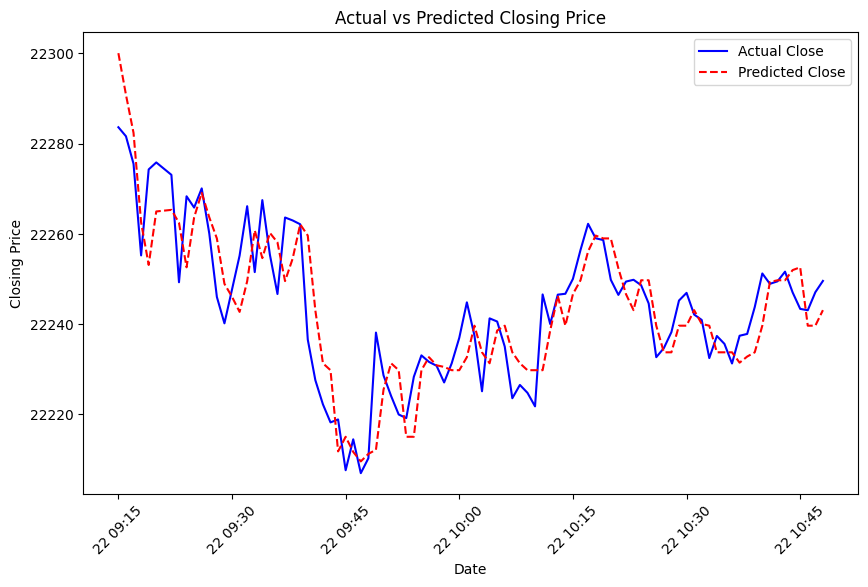

KeyboardInterrupt: 

In [9]:

# Continuously fetch data and make predictions every 1 minute
while True:
    # Fetch data and plot
    fetch_data_and_predict()

    # Countdown timer
    for i in range(60, 0, -1):
        print(f"Time remaining: {i} seconds", end='\r')
        time.sleep(1)

    # Clear the last remaining time message
    clear_output(wait=True)